In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run the make_prediction() function at the end to test the model

In [4]:
df = pd.read_csv("student_scores.csv")

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.shape

(25, 2)

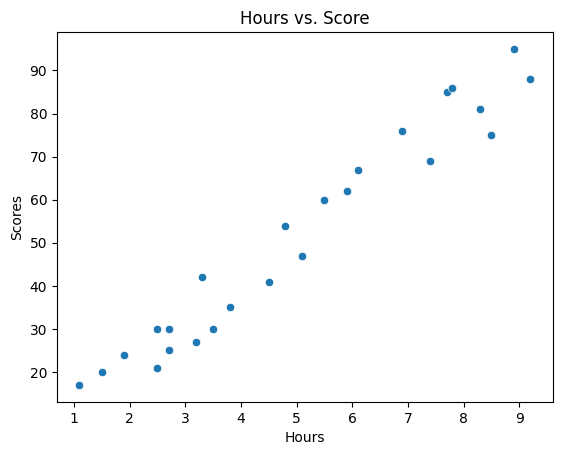

In [13]:
sns.scatterplot(data = df, x="Hours", y="Scores")
plt.title("Hours vs. Score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [25]:
# prepare data for training

x = df["Hours"].values
y = df["Scores"].values

<h1>LINEAR REGRESSION</h1>

In [21]:
# main predict function (vectorized)
def prediction(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):
    fwb = prediction(x, w, b)
    
    total_cost = (1 / (2 * m)) * np.sum(((fwb - y) ** 2))

    return total_cost

In [23]:
# gradient descent to get w and b (vectorized)

def compute_gradient(x, y, w, b):
    m = len(x)

    error = prediction(x, w, b) - y

    dj_dw = (1 / m) * np.dot(x, error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iterations):

    cost_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost_history.append(compute_cost(x, y, w, b))

    return w, b, cost_history

<h1>Training</h1>

In [28]:
w = 0
b = 0
alpha = 0.01
iterations = 100

w_final, b_final, cost_history = gradient_descent(x, y, w, b, alpha, iterations)

print(f"final w: {w_final}")
print(f"final b: {b_final}")


final w: 9.89349329141421
final b: 1.754563884539238


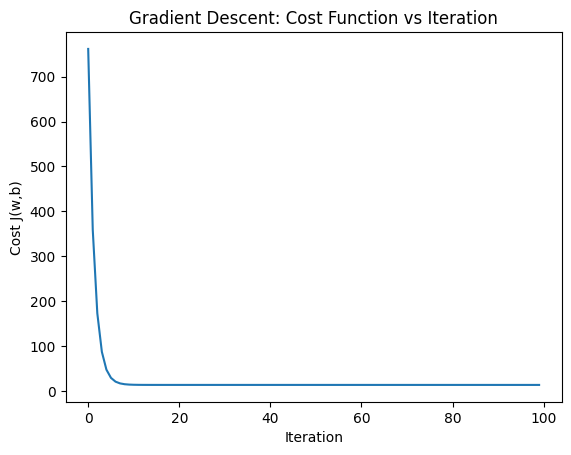

In [29]:
# Plot cost vs. iteration (how Gradient Descent learns)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost Function vs Iteration")
plt.show()

In [51]:
# move this somewhere else later

import time
def make_prediction():
    print("[Score prediction via hours of studying]")
    hours = float(input("How many hours did you study?: "))
    
    predict_score = prediction(hours, w_final, b_final)
    print("Predicting...")
    time.sleep(3)  # Pause execution for 3 seconds
    print("Prediction complete!")
    print(f"You can get {int(predict_score)} score in a test within {hours} hours of studying!")

<h1>See if the model fits the data</h1>

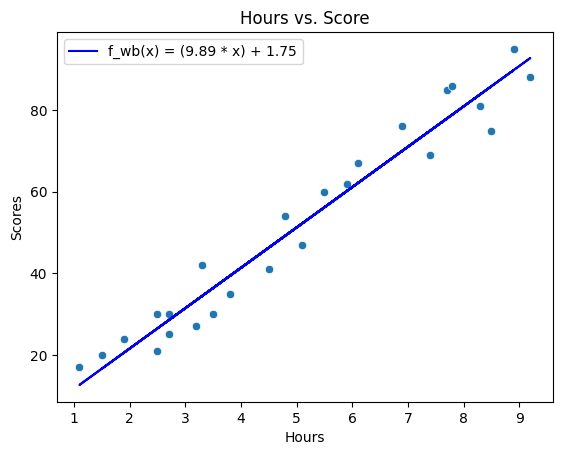

In [37]:
lrLine = prediction(x, w_final, b_final)

sns.scatterplot(data = df, x="Hours", y="Scores")

plt.title("Hours vs. Score")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.plot(x,lrLine, color="blue", label=f"f_wb(x) = ({w_final:.2f} * x) + {b_final:.2f}")
plt.legend()

plt.show()

# INSANE

<h1> SAMPLE PREDICTION </h1>

In [65]:
make_prediction()

[Score prediction via hours of studying]


How many hours did you study?:  1


Predicting...
Prediction complete!
You can get 11 score in a test within 1.0 hours of studying!


testing test